<h1><center>Laboratorio 5: El Pandas no Muerde (act IV) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla
- Auxiliar: Ignacio Meza D.
- Ayudante: Constanza Peña

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno: José Luis Cádiz Sejas



### **Link de repositorio de GitHub:** `https://github.com/JLCdata/Programacion_Data_Science`

### Indice 

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

# Temas a tratar

- Programación orientada a objetos.
- Programación funcional.
- Librería Numpy para manejo de datos en arreglos/tensores.

## Reglas:

- Fecha de entrega: 22/10/2021
- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [129]:
# Libreria Core del lab.
import numpy as np
#!pip install --upgrade pandas
#!pip install xlrd
#!pip install openpyxl
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
#!pip install --upgrade plotly
#!pip install missingno
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas y si es posible extraer los diferenciar los tipos de clientes que posee el retail.

Para esto, el área de ventas les entrega el archivo `online_retail_II.xlsx` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [130]:
df_retail = pd.read_pickle("online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## 1.2 Analisís Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

1. **Análisis Univariado**: Estudia los patrones de las variables a través de estadísticas de resumen, como medidas de tendencia central y análisis de la distribución de los datos.

2. **Análisis Multivariado**: Estudia como se comporta una variable con respecto a las otras, como scatter plots y matrices de correlación.
3. **Análisis de datos faltantes**: Estudia los campos tienen datos faltantes y que % de estos son datos faltantes.

Estudiar de este modo los datos nos permite entender el comportamiento individual de cada variable, como se relacionan las variables entre si y seleccionar estrategias para tratar datos faltantes.

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [131]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe(datetime_is_numeric=True)])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns={"index": serie.name, serie.name: "Count"})
        )
        fig = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

In [132]:
profile_serie(df_retail[df_retail.columns[0]]) 

## Invoice Profile

Type                           category
Number of observations           525461
Unique                            28816
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   517456
Duplicate rows (%)              98.48 %
Total size in memory      2338386 bytes
dtype: object

**Se observa que el tag es categorico, el cual representa el codigo de factura y no tiene valores missing, se observa que el 98% de los datos es duplicado, lo cual tiene sentido ya que en una misma boleta pueden exisitir varios productos. A partir de los valores unicos, se aprecia que se tienen 28816 facturas registradas. La factura que más compra es la 537434.**

In [133]:
profile_serie(df_retail[df_retail.columns[1]]) 

## StockCode Profile

Type                           category
Number of observations           525461
Unique                             4632
Top                              85123A
Freq                               3516
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525026
Duplicate rows (%)              99.92 %
Total size in memory      1220242 bytes
dtype: object

**A partir de la información, StockCode es una variable categorica, que representa el codigo de producto. Se observa que hay 4632 productos registrados. El producto que más se compra es el que tiene código 85123A.**


In [134]:
profile_serie(df_retail[df_retail.columns[2]]) 

## Description Profile

Type                                                  object
Number of observations                                525461
Unique                                                  4682
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3549
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        525198
Duplicate rows (%)                                   99.95 %
Total size in memory                           4203816 bytes
dtype: object

**El tag Description es tipo string, el cual representa la descripción del producto. Se observa que los productos más vendido son "WHITE HANGING HEART T-LIGHT HOLDER" el cual coincide con el código 85123A mencionado anteriormente.**

In [135]:
profile_serie(df_retail[df_retail.columns[3]]) 

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object

**El tag Quantity es tipo entero, el cual representa la cantidad de productos comprados en una factura. Se observan valores inconsistentes tales como -9600 compras, siendo el 2% aprox. valores negativos y potenciales outliers como el valor maximo de quantity, 19152.**

In [136]:
profile_serie(df_retail[df_retail.columns[4]]) 

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.845017856
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
Total size in memory                      4203816 bytes
dtype: object

**El tag Invoice date es tipo datetime, el cual representa la fecha de compra. Se tienen registros desde finales de 2009 hasta finales de 2010, siendo la mayoria de los datos del 2010.**

In [137]:
profile_serie(df_retail[df_retail.columns[5]]) 

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

**El tag Price es tipo float, el cual representa el precio del producto. Se observan inconsistencias, tales como precios negativos y potenciales outliers.**

In [138]:
profile_serie(df_retail[df_retail.columns[6]]) 

## Customer ID Profile

Type                           category
Number of observations         417534.0
Unique                           4383.0
Top                             14911.0
Freq                             5710.0
                                       
Missing cells                    107927
Missing cells (%)               20.54 %
Duplicate rows                   525327
Duplicate rows (%)              99.97 %
Total size in memory      1218250 bytes
dtype: object

**El tag Customer es tipo category, el cual representa el código del cliente. Se observa un 20% de valores missing y el cliente que más registro tiene es el 14911.**

In [139]:
profile_serie(df_retail[df_retail.columns[7]]) 

## Country Profile

Type                              object
Number of observations            525461
Unique                                40
Top                       United Kingdom
Freq                              485852
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    525461
Duplicate rows (%)               100.0 %
Total size in memory       4203816 bytes
dtype: object

**El tag Country es tipo string, el representa el pais donde se efectuo la venta. Se observa que la gran mayoria de ventas se llevan acabo en United Kingdom.**

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes.

In [140]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df.corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

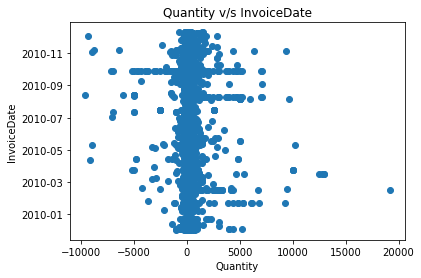

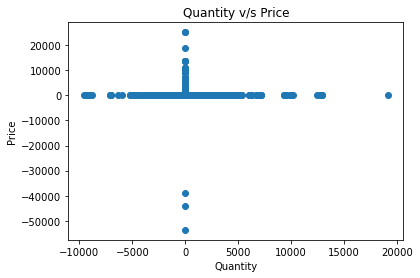

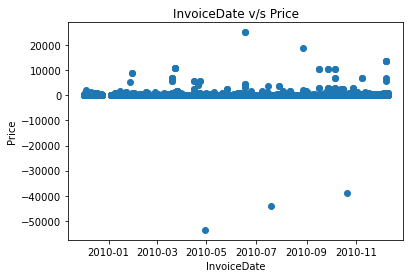

## Correlation:

## Missing Matrix:

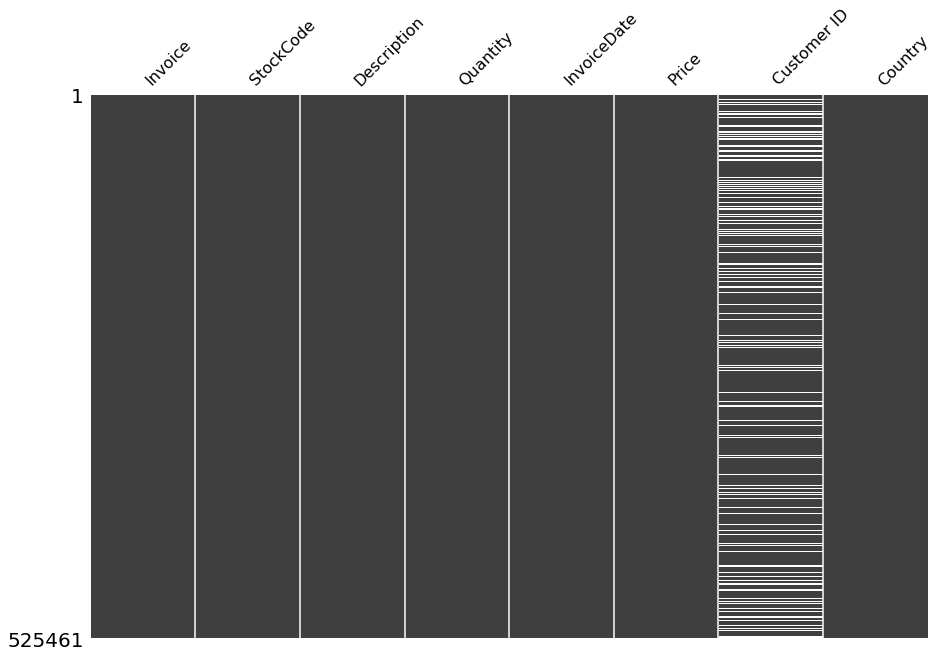

In [141]:
# Analisis bivariado
profile_df(df_retail)

**A partir del analisis bivariado se observa que en general la cantidad de productos comprados y su precio no vario a lo largo del periodo de tiempo, además se observa que algunos productos con precios más elevado fueron comprados en menores cantidades.A partir de la matriz de correlación una baja correlación negativa entre el precio y la cantidad, lo cual tiene sentido según el entendimiento natural del contexto de los datos. A partir de la matriz de missings se observa que el campo Customer ID presenta Nans.**

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que realice una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

In [142]:
# Función que remueve valores negativos y outliers
def without_outliers(df):
    df_=df.copy()
    for i in ["Price","Quantity"]:
        # Condición de valores no negativos:
        df_=df_[df_[i]>0]
        
        # Se obtienen los valores estadísticos para calcular IQR:
        Q3=df_[i].describe()[6]
        Q1=df_[i].describe()[4]
        IQR=Q3-Q1
        
        # Se imponen las condiciones que deben cumplir los valores típicos:
        df_=df_.loc[(df_[i]> Q1-1.5*IQR) & (df_[i]<Q3+1.5*IQR)].reset_index(drop=True)
        
    # Tratamiento de valores faltantes en Customer ID
    df_["Customer ID"]=df_["Customer ID"].astype(float).fillna('-').astype("category")
      
    return df_ 

In [143]:
# Dataframe sin outliers
df_retail_new=without_outliers(df_retail)

**Volviendo a aplicar el analisis exploratorio:**

In [144]:
# Analisis univariado
for i in df_retail_new.columns:
    profile_serie(df_retail_new[i]) 


## Invoice Profile

Type                           category
Number of observations           451090
Unique                            18943
Top                              537434
Freq                                596
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   449653
Duplicate rows (%)              99.68 %
Total size in memory      2189644 bytes
dtype: object

## StockCode Profile

Type                           category
Number of observations           451090
Unique                             3955
Top                              85123A
Freq                               2760
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   450932
Duplicate rows (%)              99.96 %
Total size in memory      1071500 bytes
dtype: object

## Description Profile

Type                                                  object
Number of observations                                451090
Unique                                                  4235
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    2791
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        450915
Duplicate rows (%)                                   99.96 %
Total size in memory                           3608848 bytes
dtype: object

## Quantity Profile

Type                              int64
Number of observations         451090.0
Mean                           6.044288
Std                            6.324338
Min                                 1.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                                28.0
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                           1.800239
Skew                           1.560282
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   451090
Duplicate rows (%)              100.0 %
Total size in memory      3608848 bytes
dtype: object

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           451090
Mean                      2010-06-29 22:22:15.363452928
Min                                 2009-12-01 07:45:00
25%                                 2010-03-22 10:33:00
50%                                 2010-07-08 11:44:00
75%                                 2010-10-17 15:16:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   449839
Duplicate rows (%)                              99.72 %
Total size in memory                      3608848 bytes
dtype: object

## Price Profile

Type                            float64
Number of observations         451090.0
Mean                           2.752435
Std                            2.029012
Min                               0.001
25%                                1.25
50%                                 2.1
75%                                3.75
Max                                8.62
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                           0.645762
Skew                           1.168528
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   451040
Duplicate rows (%)              99.99 %
Total size in memory      3608848 bytes
dtype: object

## Customer ID Profile

Type                           category
Number of observations           451090
Unique                             4152
Top                                   -
Freq                              88614
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   451026
Duplicate rows (%)              99.99 %
Total size in memory      1067660 bytes
dtype: object

## Country Profile

Type                              object
Number of observations            451090
Unique                                40
Top                       United Kingdom
Freq                              420245
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    451090
Duplicate rows (%)               100.0 %
Total size in memory       3608848 bytes
dtype: object

## Bivariant Analysis:

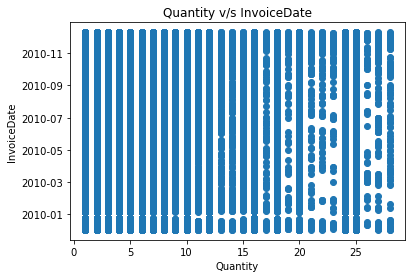

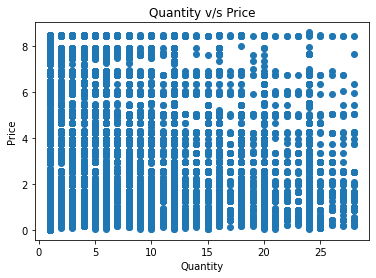

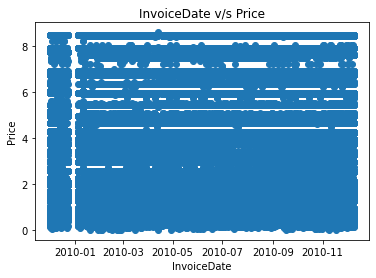

## Correlation:

## Missing Matrix:

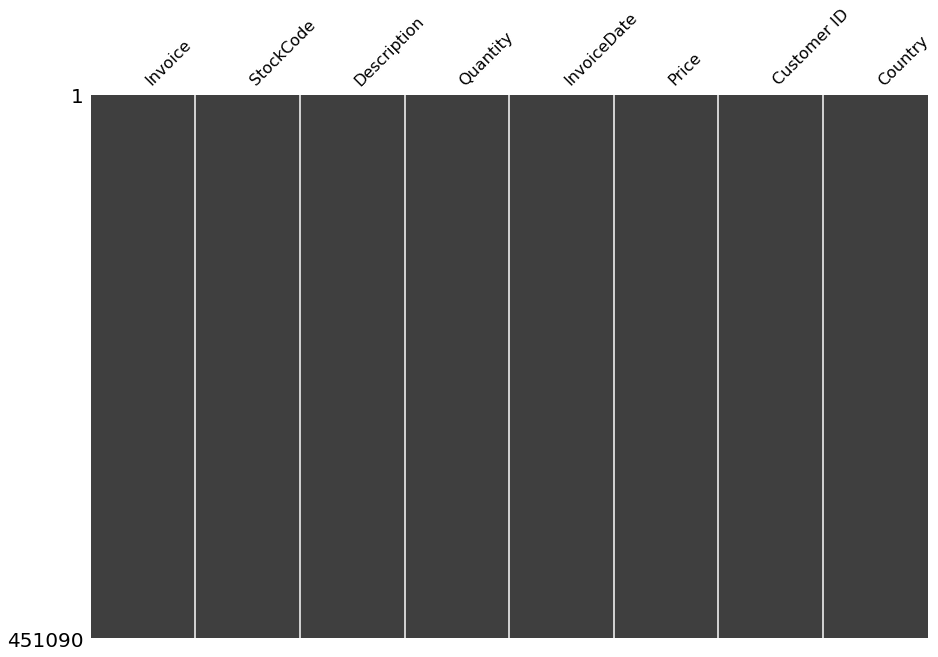

In [145]:
# Analisis multivariado
profile_df(df_retail_new)

**Luego del tratamiento de datos se observa que ya no existen valores negativos para los campos Price y Quantity y además sus diagramas de caja son más proporcionales luego de imponer las condiciones de IQR para los outliers. Adicionalmente los valores missing del campo Customer ID fueron reemplazados por "-".**

### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [146]:
# Definimos la ganancia como el precio unitario (Price) multiplicado por Quantity:
df_retail_new["Profit"]=df_retail_new["Price"]*df_retail_new["Quantity"]

In [147]:
# Top 30 productos con mayor ganancia
top30=df_retail_new[["StockCode","Profit"]].groupby("StockCode").sum().sort_values('Profit',
ascending=False).reset_index(drop=False)[0:30]
top30["StockCode"]=top30["StockCode"].astype(str)
display(top30)

,StockCode,Profit
0,85123A,55614.79
1,48138,31019.96
2,47566,28273.78
3,21754,27807.76
4,85099B,27300.78
5,20685,26639.42
6,21621,25491.69
7,84879,24097.89
8,22139,22874.55
9,82494L,21147.51


In [148]:
# Grafico de barras
fig = px.bar(top30, x="StockCode", y="Profit")
fig.update_layout(
    title="Grafico de barras top 30 productos que generan mayores ganancias")
fig.show()

In [149]:
# Articulos más vendidos
# Top 30 productos más vendidos
top30_quantity=df_retail_new[["StockCode","Quantity"]].groupby("StockCode").sum().sort_values('Quantity',
ascending=False).reset_index(drop=False)[0:30]
display(top30_quantity)

,StockCode,Quantity
0,21212,22342
1,85123A,18341
2,84991,15761
3,84879,13869
4,21232,13456
5,85099B,13325
6,21977,13009
7,20725,10770
8,21498,10152
9,84970S,9243


In [150]:
#¿Los artículos más vendidos son los mismos que generan más ganancias?
# Correción de formatos
top30_quantity["StockCode"]=top30_quantity["StockCode"].astype(str)
top30["StockCode"]=top30["StockCode"].astype(str)

# Uso de isin() 
top30_quantity["StockCode"][top30_quantity["StockCode"].isin(top30["StockCode"])]

1     85123A
3      84879
4      21232
5     85099B
7      20725
21    82494L
24     21931
Name: StockCode, dtype: object

**Se puede ver que solo 7 productos de los más vendidos forman parte del top 30 de productos que generaron mayores ganancias.**

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [151]:
from datetime import datetime
# Se define nueva columna "año-mes-día"
df_retail_new["año-mes-día"]=df_retail_new["InvoiceDate"].apply(lambda x: x.strftime("%Y/%m/%d"))

In [152]:
# Ventas
ventas=df_retail_new[["año-mes-día","Profit"]].groupby("año-mes-día").sum().reset_index(drop=False)
display(ventas)

,año-mes-día,Profit
0,2009/12/01,32634.52
1,2009/12/02,28417.56
2,2009/12/03,34543.04
3,2009/12/04,26756.36
4,2009/12/05,7891.86
...,...,...
302,2010/12/05,22741.20
303,2010/12/06,34762.60
304,2010/12/07,29914.72
305,2010/12/08,28763.93


In [153]:
# Grafico de ventas
fig = px.line(ventas, x="año-mes-día", y="Profit", title='Ventas año-mes-día')
fig.show()

**Se observa que desde fines de 2009 hubo una disminución en las ventas, sin embargo desde octubre del 2010 hubo una notable mejora en las ventas de la compañia.**

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana y que **los días de atraso no se pueden utilizar para entregas de lab** solo para tareas. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>